## **DBSCAN**

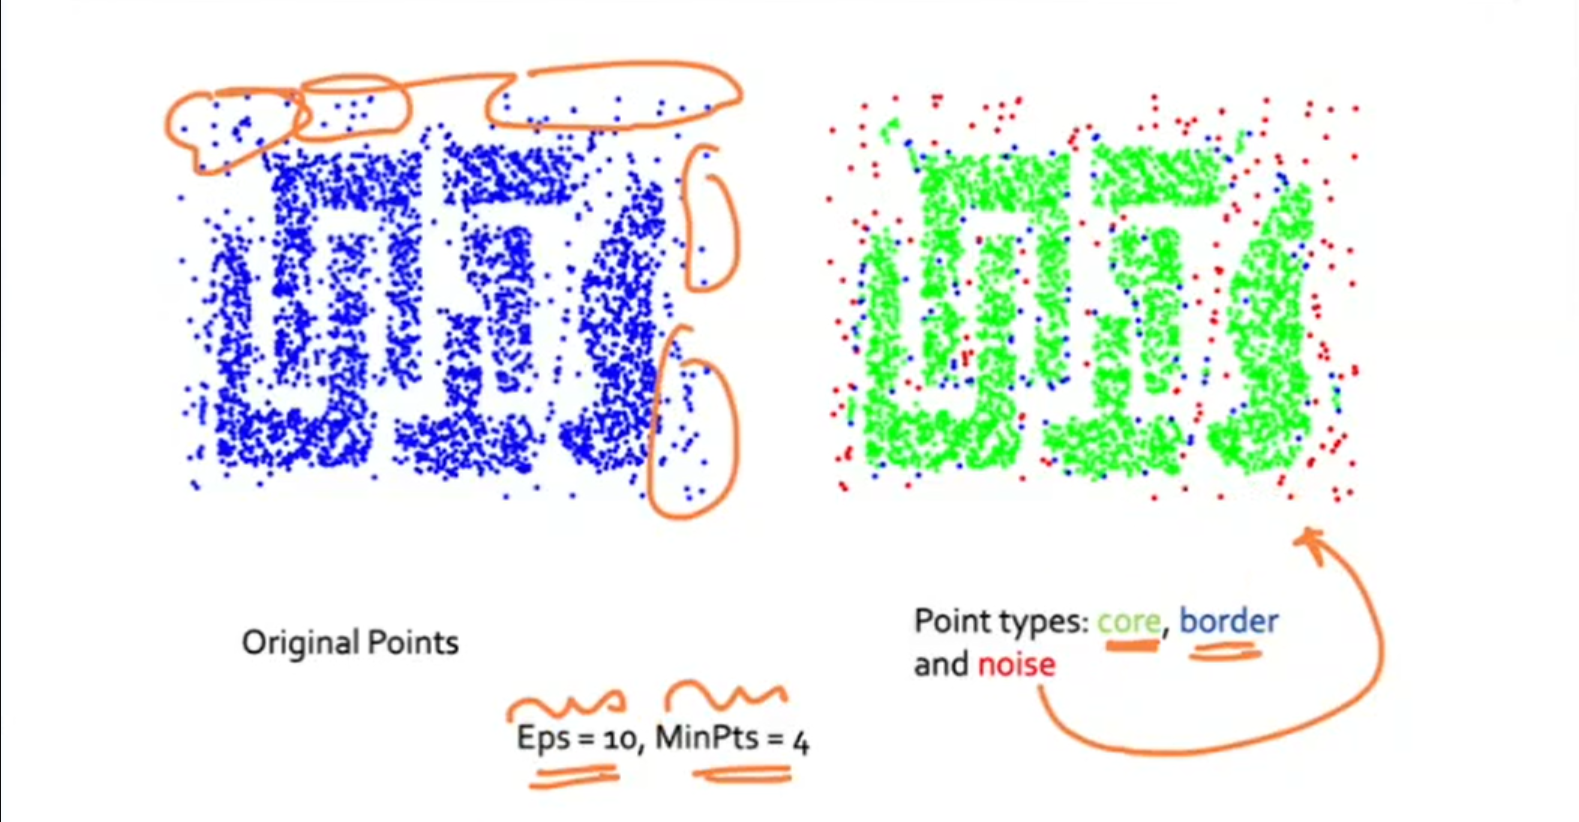

- DBSCAN refers to Density-based spatial clustering of application with noise
- DBSCAN works fairly well with large data and is able to handle noise and outliers very efficiently

#### **Key Ideas behind DBSCAN**

To understand the working of DBSCAN, there are some key-ideas that we need to understand. Let's do that in the next couple of minutes

1. Min points
2. Eps (epsilon)
3. core-point
4. border-point
5. noise-point

##### **Density and Dense Region**

As the name suggests that it is **Density-based**, but what does it really mean?

- DBSCAN uses a concept of density, which can be defined as;

  - at a certain point P, density at point P is the number of points within a hypersphere (including the point ′P′ itself) centered at P with radius of epsilon

  Q. **We have defined what density is, but which region can be chosen as a dense region?**

To answer this, consider any region around point P within **eps** radius, if there are more datapoints than **min_samples**, we call the region as a Dense region.

For example, let's say we have **eps**=1 and **min_samples**=10

Consider two points **P1** and **P2**, both with a radius of eps
Suppose there are 20 points around point **P1**, and only 6 points around point **P2** within the radius of **eps**, then we say the region around point **P1** as dense and region around point **P2** as non-dense

##### **min_samples and Epsilon**

> Q. **So, what exactly are '$min\_samples$' and '$eps$'?**

- **$min\_samples$** are the minimum number of points that we need in a hypersphere around point $P$ (including the point $'P'$ itself) within the radius of **$eps$** for considering the region as **Dense** region.

- **$min\_samples$** acts like a certain threshold and $eps$ is the radius of the hypersphere

##### **Core point**


This leads us to discuss next key-ideas. We'll start with $core-point$. So, what is a $core-point$?

- If a point $P$ has points (including the point $P$ itself) $\geq min\_samples$ within the radius of $eps$, then $P$ is a core point.
- This also implies that point $P$ has a dense region around it

##  

##  

##  

##  

##### Q. Border Point


Next, we'll dicuss **border-point**. So, what is a border point?

- A point $P$ can be defined as a border-point if:
  1. $P$ is not a core point
  2. Point $P$ lies in the neighborhood of point $Q$ such that point $Q$ is a core-point

> Q. what is **neighborhood**?
- A point $P$ is said to be in the neigborhood of point $Q$, if distance between point $P$ and $Q$ is less than $eps$ value; i.e. $dist(P,Q) \leq eps$

##### **Noise Point**

One more type of point is **Noise Point**.
- It is a point which is neither a core point nor border point
- Suppose around core point $P$, a border point $Q$, and a point $R$ which is in a non-dense region, the point $R$ is said to be a noise point

**NOTE:** One thing to understand is that, when using DBSCAN, we fix two things:
1. Min Points
2. Epsilon.

By fixing these hyperpameters, we get core points, border points and noise points as well

Want to see how DBSCAN labels datapoints into core points, border points and noise points? Here you go:

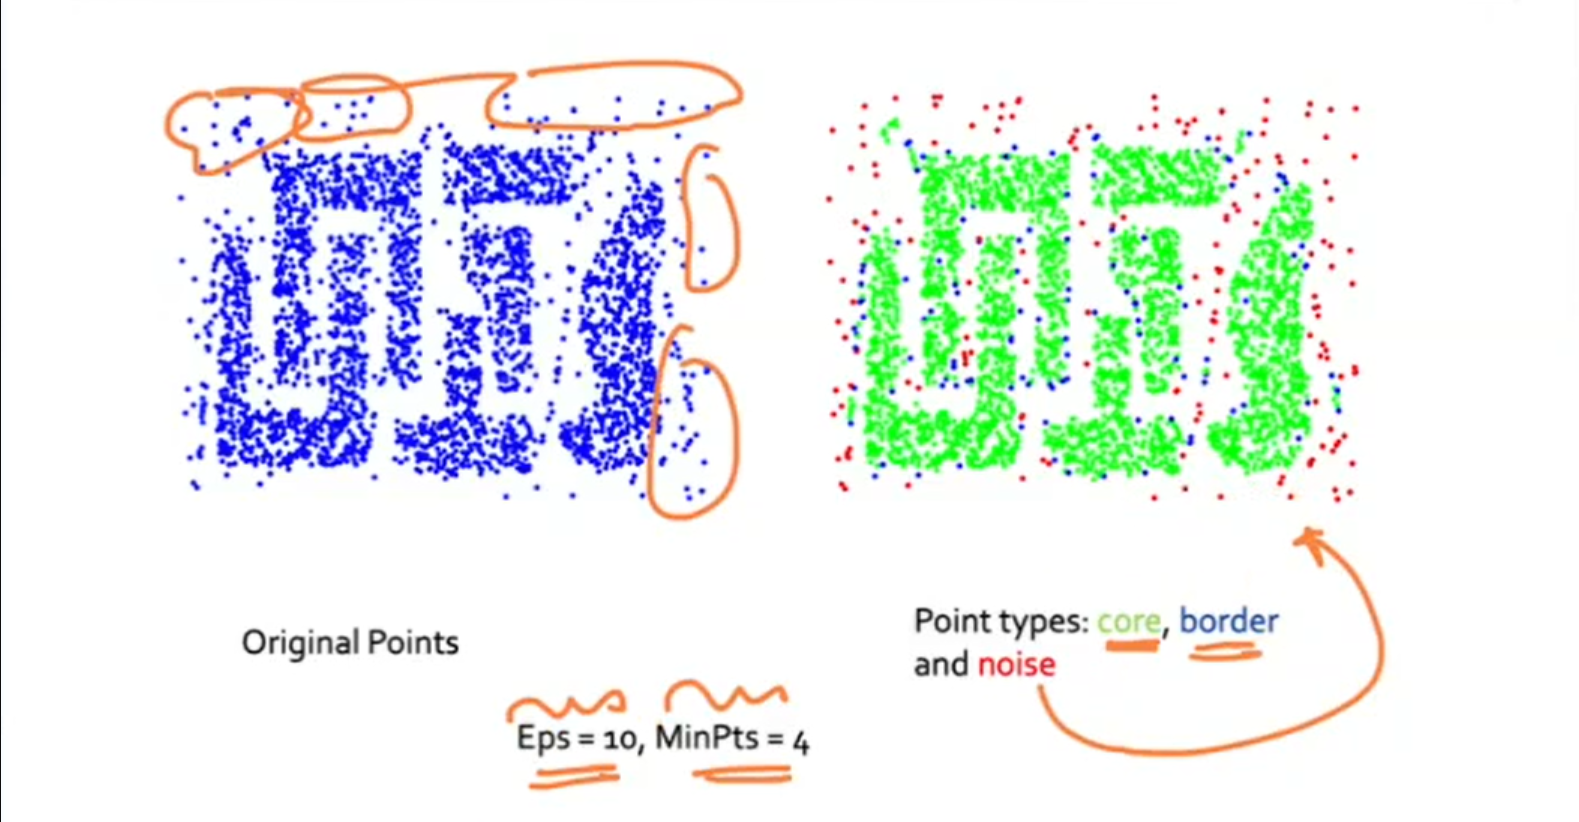

Observe how well DBSCAN can differentiate between core points, border points and border points. This is exactly what we wanted for segmenting customers.

Before moving to the working of DBSCAN, let's understand two more terms:
1. Density Edge
2. Density Connected points

##### **Density Edge**
- If we draw a line from one point (vertex) to another point of our dataset, then it is known as an edge

So, what is a density edge?

- If points $P$ and $Q$ are two core points and the distance between point $P$ and $Q$ is less than or equal to $eps$ value, then an edge between point $P$ and $Q$ is known as a **density edge**

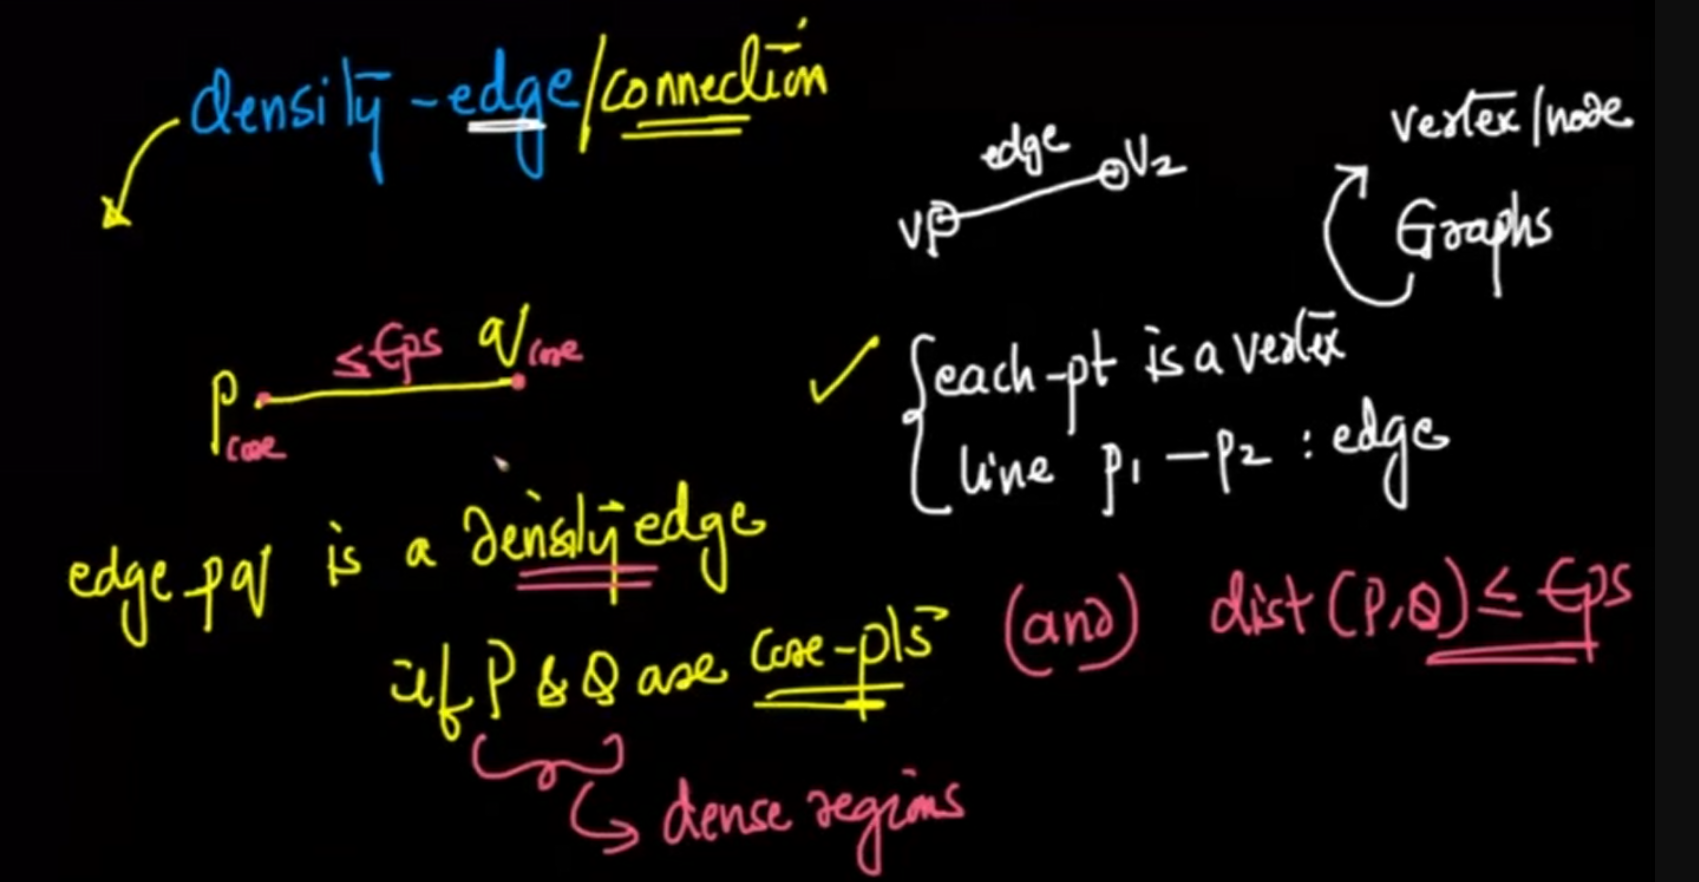

##### **Density Edge**
- If we draw a line from one point (vertex) to another point of our dataset, then it is known as an edge

So, what is a density edge?

- If points $P$ and $Q$ are two core points and the distance between point $P$ and $Q$ is less than or equal to $eps$ value, then an edge between point $P$ and $Q$ is known as a **density edge**

## **DBSCAN Algorithm**

So, how does DBSCAN uses all this information, and makes clusters out of datapoints? Lets see how DBSCAN Algorithm works



#### **Step 1**

- For each point $x_{i}$ that belongs to the dataset $D$, label it as either core point, border point, or noise point.

How can this be done?
- We can do this by using the concept of **Range Queries** which is popularly used in databases community
- We define this query as: $RangeQuery(D, x_{i}, eps)$
- The query tells how many points in the dataset $D$ are withing the radius of $eps$

#### **Step 2**

- Remove all the noise points from the dataset
- Time complexity of this step would be $O(n)$

This is basically a noise removal step


##  

##  

##  

##  

##  

##  

##  

#### **Step 3**

This step is where things get really interesting. Let's see the 3$^{rd}$ step.

- For each core point $P$ that is not yet assigned to any clustered:
  - create a new cluster with point $P$
  - Add all points that are density connected to point $P$, to the $P$'s cluster

Let's understand this with an example

- Consider a core point $P$ and there are three core points $P_{1}, P_{2}$ and $P_{1}$ which are density connected.

- Then, we group all the three points in the cluster of point $P$

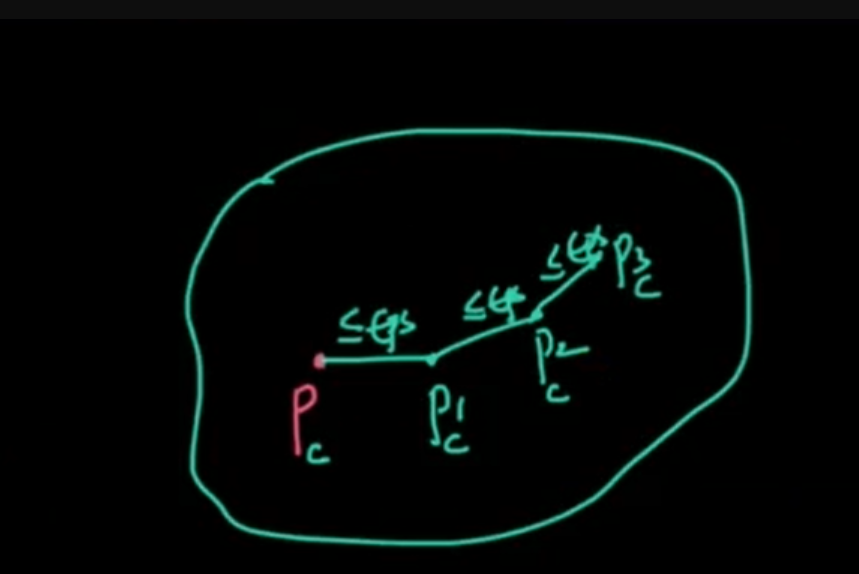

So, we've dealt with noise points and core points. What about border points?
Lets see how DBSCAN deals with border points

#### **Step 4**

- For each border point, we assign it to the nearest core points' cluster.

 - For example, if we're having a cluster having core points $P_{1}, P_{2}.... P_{9}$, and a border point $P_{10}$ which is near the cluster.

  -
  We merge border point $P_{10}$, into the cluster of core points $P_{1}, P_{2}.... P_{9}$
***

**Q. So, we studied how DBSCAN works. What now? One thing that you can question about is that what should be the ideal values of min_samples and $eps$?**

 Let's find that out

## **Adjusting min_samples**

1.  So there are some rules of thumb that people have made over the past years, which typically works well. They are:
  - value of $min\_samples$ should be greater than or equal to $d+1$; where $d$ is dimensionality of the data
  - lot of libraries use the value of $min\_samples$ approximately equal to $2 * d$

The points mentioned above are typically rules of thumb and these are used because they tend to work fairly good in most of the cases

2. Given an epsilon value, if the dataset is noisy, we pick larger $min\_samples$

## **Adjusting Epsilon Value**

> Q. **Now**, how to tune $eps$ value?

Let's assume we've fixed the value of $min\_samples = 4$.

Then, we'll perfrom a bunch of steps:

 - Step 1:
  - for every point $x_{i}$ in dataset, we compute a distance $d_{i}$.
  - $d_{i}$ refers to the distance from $x_{i}$ to $x_{i}$'s 4$^{th}$ nearest neighbor (because we've set $min\_samples$ = 4)

- Step 2:
  - Sort the values of $d_{i}$'s and plot them. You'll notice that the distance will increase graudally and then suddenlly, at a certain point, the value of distance will get boosted
  - So, the index at which the value of $d_{i}$ distance got boosted will be used as the value of $eps$
  - The indices having higher values of $d_{i}$'s will be outliers

## **Advantages & Disadvantages of DBSCAN**

#### **When does DBSCAN work well?**

- It’s resistant to noise
- Can handle clusters of different shapes and sizes.

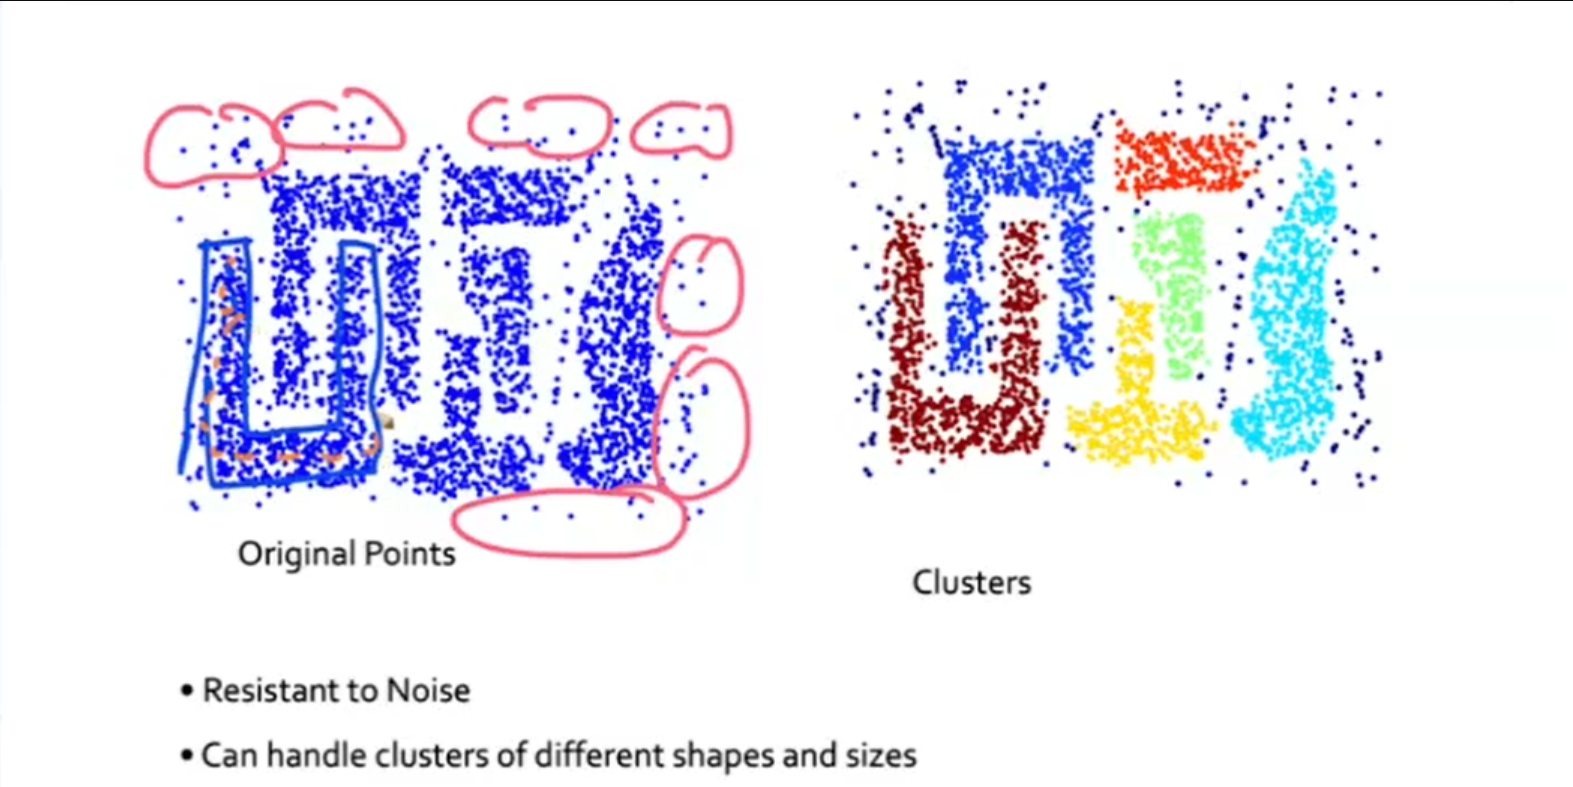

- It doesn’t require one to specify the number of clusters a priori.
- It requires only two parameters: MinPts and Epsilon.
- It is designed for use with databases as it’s created by the database
community.



##  

##  

##  

##  

##  

##  

##  

##  

##  

##  

##  

##  

##  

##  

##  

#### Limitations of DBSCAN:
- Even a small change in the hyperparameters, we can get a completely different type of clusters. So, it’s quite sensitive to the choice of hyperparameters.

- If the data and scale are not well understood, choosing a meaningful distance threshold ε can be difficult.

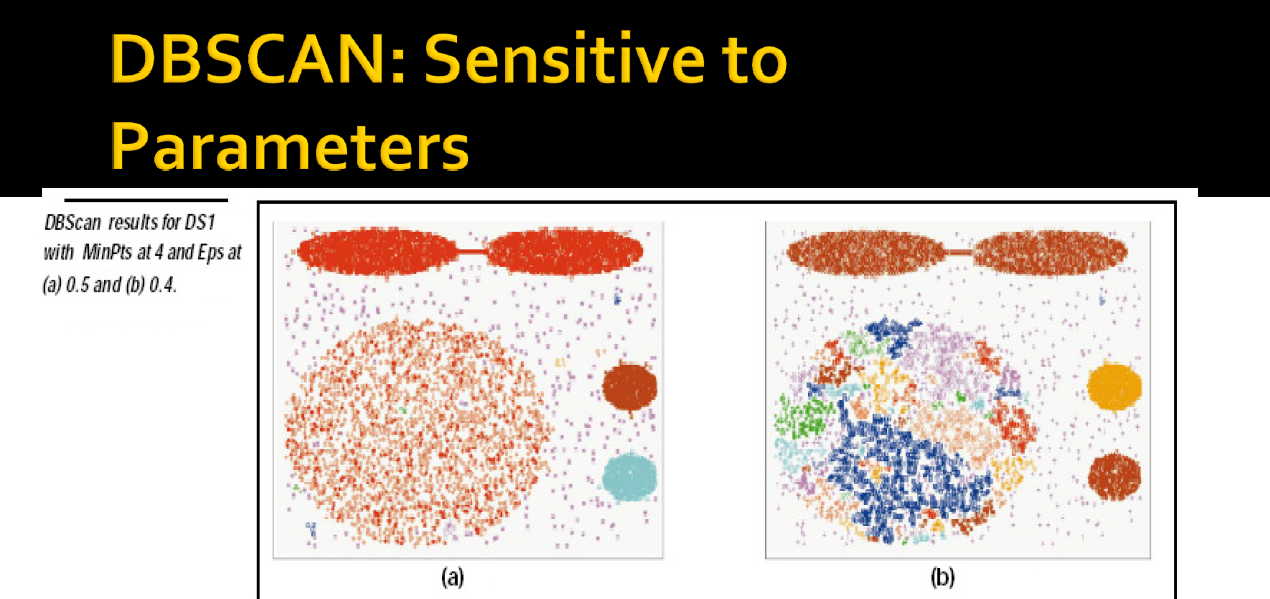

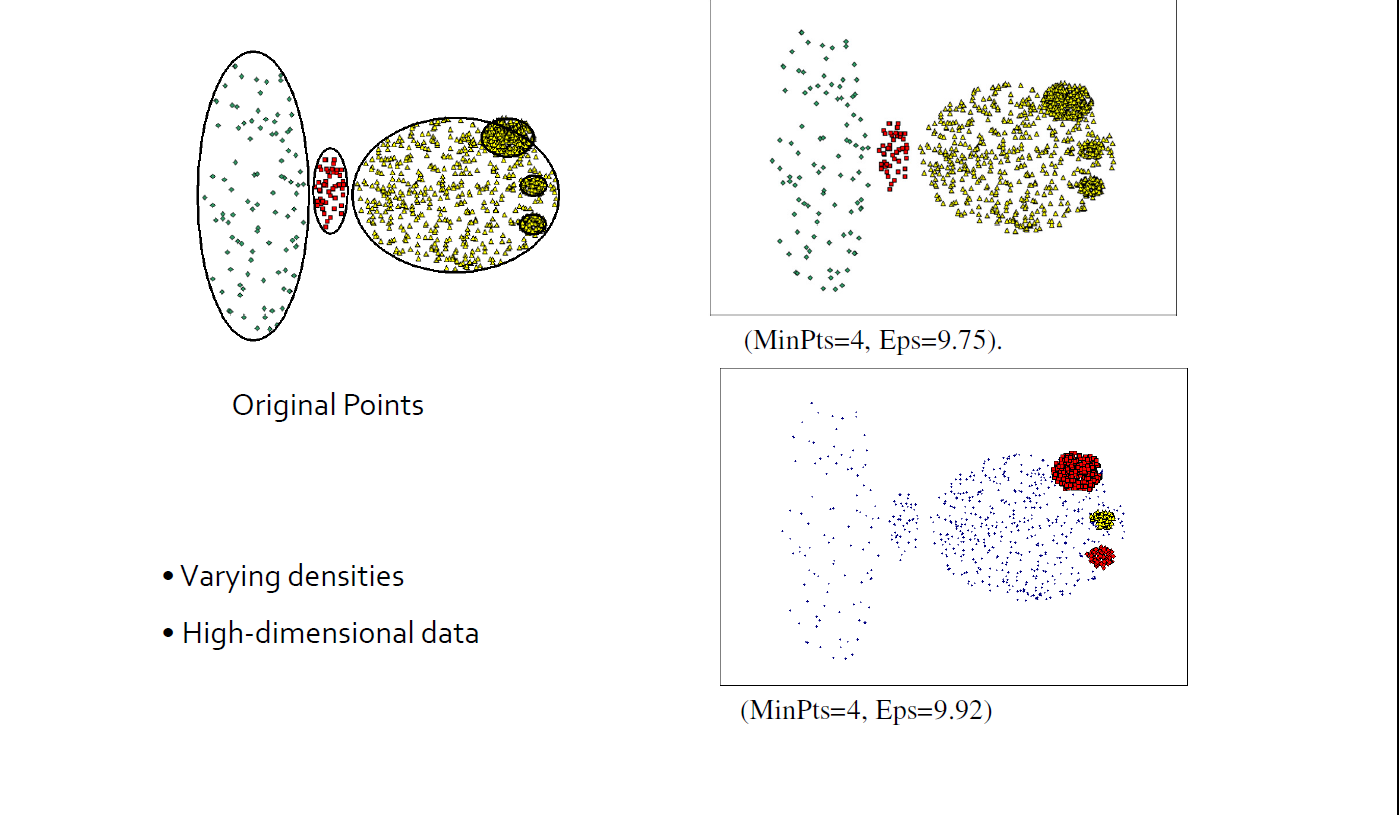

## **`DBSCAN from scratch`**

In [ ]:
class DBScan:

  def __init__(self, eps = 0.5, min_samples = 5):
    self.eps = eps
    self.min_samples = min_samples

  @classmethod
  def assign_labels(cls, data, index, labels, label, eps):
    # Method for labelling density connected datapoints recursively
    edge_dist = np.sqrt(np.sum((data[index] - data) ** 2, axis = 1))
    density_edge_indexes = np.where((edge_dist <= eps) & (labels == -1) & (pt_types == 'C'))[0]
    if len(density_edge_indexes) == 0:
      return
    else:
      labels[density_edge_indexes] = label
      for density_edge_index in density_edge_indexes:
        assign_labels(data, density_edge_index, labels, label, eps)


  def fit(self, X):
    from copy import deepcopy
    import numpy as np
    n = X.shape[0]
    pt_types = np.array([''] * n)
    labels = -np.ones(shape = (n, ))
    core_indexes = np.array([])
    border_indexes = np.array([])

    for i, pt in enumerate(X):
      dist = np.sqrt(np.sum((pt - X) ** 2, axis = 1))
      pts_within_eps = (dist <= (self.eps)).sum()
      if pts_within_eps >= self.min_samples:
        pt_types[i] = 'C'
        core_indexes = np.append(core_indexes, i)

    for k, pt in enumerate(X):
      if pt_types[k] != 'C':
        for core_index in core_indexes:
          core_pt = X[core_index]
          dist = np.sqrt(np.sum((pt - core_pt) ** 2))
          if dist <= self.eps:
            pt_types[k] = 'B'
            border_indexes = np.append(border_indexes, k)
            break

    pt_types[(pt_types != 'C') & (pt_types != 'B')] = 'N'

    label = 0
    for core_index in core_indexes:
      DBScan.assign_labels(X, core_index, labels, label, self.eps)
      label += 1

    for border_index in border_indexes:
      border_pt = X[border_index]
      min_dist = np.inf
      min_dist_core_index = None
      for core_index in core_indexes:
        core_pt = X[core_index]
        dist = np.sqrt(np.sum((border_pt - core_pt) ** 2))
        if dist <= self.eps and dist < min_dist:
          min_dist = dist
          min_dist_core_index = core_index
      labels[border_index] = labels[min_dist_core_index]

    self.core_sample_indices_ = core_indexes
    self.labels_ = labels
    self.border_indices = border_indexes


  def fit_predict(self, X):
    self.fit(X)
    return self.labels_